In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("mercedesbenz.csv")
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data=pd.read_csv("mercedesbenz.csv",usecols=['X1','X2','X3','X4','X5','X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [4]:
#Lets examine how many unique labels exists in each variable
for col in data.columns:
    print(col,':',len(data[col].unique()),' labels')

X1 : 27  labels
X2 : 44  labels
X3 : 7  labels
X4 : 4  labels
X5 : 29  labels
X6 : 12  labels


In [5]:
#Lets see how many column do we get if we do one hot encoding on these variables
pd.get_dummies(data,drop_first=True).shape

(4209, 117)

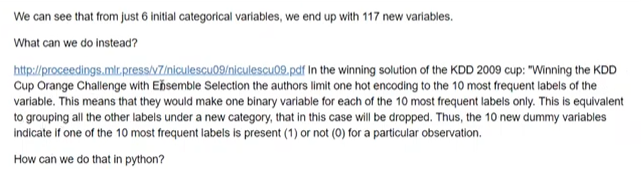

In [7]:
#Lets find out the 20 most frequent categories for the variable X2
data.X2.value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
z       19
ag      19
Name: X2, dtype: int64

What they did in the competition is for the top 10 they did one hot encoding and for the remaining categories they added it as 0

In [9]:
top_10=[x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [10]:
# and now we make 10 binary variables

for label in top_10:
    data[label]=np.where(data['X2']==label,1,0) #if the value is coming in top 10 make it as 1 else 0.
    #This will create 1 for the columns which has a column name which is in top 10, else all the column values for the 
    #top 10 column names will become 0

data[['X2']+top_10].head(40)
#as you can see 'at' does not belong to top 10, hence all the top 10 column names will be 0.
# 'n' is in top 10 hence the column with name n has 1.

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [13]:
#get whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df,variable,top_x_labels):
    # fucntion to create the dummy varaible to most frequent labels
    # we can vary the number of most frequent lebels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label]=np.where(data[variable]==label,1,0)

#read the data again
data=pd.read_csv("mercedesbenz.csv",usecols=['X1','X2','X3','X4','X5','X6'])


In [14]:
#encode X2 into the 10 most frequent categories
one_hot_top_x(data,'X2',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [15]:
#finding the top 10 most frequent categories for X1
top_10=[x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]
#encode X1 into the 10 most frequent categories
one_hot_top_x(data,'X1',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# We can perform similarly for all the features we desire to encode

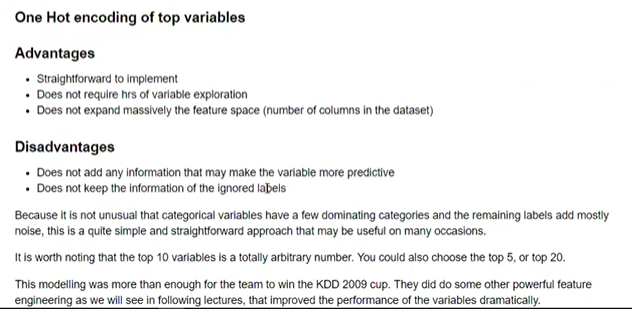